# ML Assignment - LitCovid

## 1. Load Data

Load the basic Python libraries for data processing

In [1]:
import pandas as pd
import numpy as np

Merge the provided train, test and dev sets to obtain the full dataset

In [2]:
train_set = pd.read_csv("data/LitCovid.train.csv", sep=',')
test_set = pd.read_csv("data/LitCovid.test.csv", sep=',')
dev_set = pd.read_csv("data/LitCovid.dev.csv", sep=',')

data = pd.concat([train_set, test_set, dev_set], ignore_index=True)
data.head()

,Unnamed: 0,pmid,title,text,clean_doc,clean_doc_tokenized,human_label,label
0,0,32574291,The Battle Against COVID-19 in Jordan: An Earl...,The Battle Against COVID-19 in Jordan: An Earl...,the battle against covid-19 in jordan : an ear...,"[['the', 'battle', 'against', 'covid-19', 'in'...",prevention,1000
1,1,32409107,Resumption of activity in gastroenterology dep...,Restablecimiento de la actividad en los servic...,restablecimiento de la actividad en los servic...,"[['restablecimiento', 'de', 'la', 'actividad',...",prevention,1000
2,2,32432804,Impact of severe acute respiratory syndrome on...,Impact of Severe Acute Respiratory Syndrome (S...,impact of severe acute respiratory syndrome ( ...,"[['impact', 'of', 'severe', 'acute', 'respirat...",prevention,1000
3,3,32637365,Participation of the IL-10RB Related Cytokines...,Participation of the IL-10RB Related Cytokines...,participation of the il-10rb related cytokines...,"[['participation', 'of', 'the', 'il-10rb', 're...","treatment, mechanism",1100000
4,4,32061198,[Inhibitors of RAS Might Be a Good Choice for ...,[Inhibitors of RAS Might Be a Good Choice for ...,[ inhibitors of ras might be a good choice for...,"[['[', 'inhibitors', 'of', 'ras', 'might', 'be...","treatment, mechanism",1100000


Describe the simple statistics of all the columns

In [3]:
data.describe(include = 'object')

,title,text,clean_doc,clean_doc_tokenized,human_label
count,23034,23038,23038,23038,23038
unique,22938,23013,23006,23006,54
top,CORONA-steps for tracheotomy in COVID-19 patie...,Veno-venous Extracorporeal Membrane Oxygenatio...,[ respiratory support for severe 2019-ncov pne...,"[['identifying', 'rheumatic', 'disease', 'pati...",prevention
freq,4,2,2,2,9327


## 2. Exploring

List each unique values of category labels

In [4]:
data.human_label.unique()

array(['prevention', 'treatment, mechanism', 'transmission, prevention',
       'case_report', 'mechanism', 'general', 'diagnosis, treatment',
       'diagnosis', 'transmission', 'treatment', 'treatment, prevention',
       'mechanism, transmission',
       'diagnosis, treatment, mechanism, transmission, prevention',
       'diagnosis, prevention', 'diagnosis, transmission',
       'diagnosis, treatment, prevention',
       'diagnosis, transmission, prevention', 'diagnosis, mechanism',
       'mechanism, transmission, prevention',
       'diagnosis, treatment, mechanism', 'prevention, forecasting',
       'treatment, transmission, prevention',
       'treatment, mechanism, prevention', 'forecasting',
       'diagnosis, treatment, mechanism, prevention',
       'diagnosis, forecasting', 'mechanism, prevention',
       'diagnosis, treatment, transmission, prevention',
       'transmission, forecasting', 'diagnosis, mechanism, prevention',
       'diagnosis, mechanism, transmission',
    

One-hot encoding on each of the category

In [5]:
onehot = (data.human_label.str.split(r'\s*,\s*', expand=True)
   .apply(pd.Series.value_counts, 1)
   .iloc[:, 0:]
   .fillna(0, downcast='infer'))

Count the frequency of each labels

In [6]:
onehot.sum()

case_report      1914
diagnosis        4754
forecasting       461
general           368
mechanism        3549
prevention      11042
transmission     1065
treatment        6897
dtype: int64

Plot a barchart on the frequency of labels

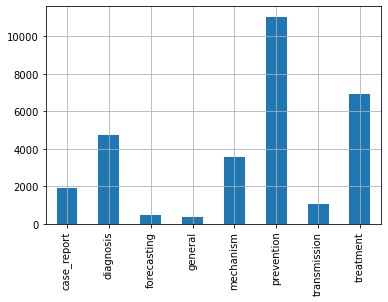

In [7]:
onehot.sum().plot(kind='bar', legend=False, grid=True)

Count the distribution on number of labels

In [8]:
onehot.sum(axis=1).value_counts()

1    16946
2     5324
3      636
4      112
5       20
dtype: int64

Plot a barchart on the distribution on number of labels

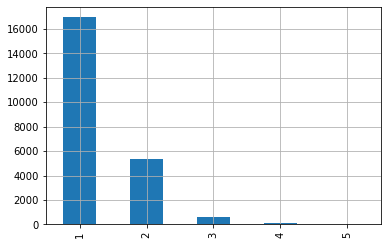

In [9]:
onehot.sum(axis=1).value_counts().plot(kind='bar', grid=True)

Word count of the literature's text

In [10]:
lens = data.text.str.len()
lens.describe()

count     23038.000000
mean       9598.053173
std       13640.951549
min         171.000000
25%        1353.000000
50%        2902.500000
75%       12530.250000
max      166027.000000
Name: text, dtype: float64

Histogram of the word count

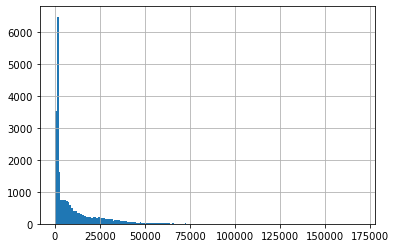

In [11]:
lens.hist(bins = np.arange(0,170000,1000))

## 3. Preprocess

Drop the unused columns/features

In [12]:
data = pd.concat([data, onehot], axis=1)
data = data.drop(['Unnamed: 0', 'pmid', 'clean_doc', 'clean_doc_tokenized', 'label', 'human_label'], axis=1)
data

,title,text,case_report,diagnosis,forecasting,general,mechanism,prevention,transmission,treatment
0,The Battle Against COVID-19 in Jordan: An Earl...,The Battle Against COVID-19 in Jordan: An Earl...,0,0,0,0,0,1,0,0
1,Resumption of activity in gastroenterology dep...,Restablecimiento de la actividad en los servic...,0,0,0,0,0,1,0,0
2,Impact of severe acute respiratory syndrome on...,Impact of Severe Acute Respiratory Syndrome (S...,0,0,0,0,0,1,0,0
3,Participation of the IL-10RB Related Cytokines...,Participation of the IL-10RB Related Cytokines...,0,0,0,0,1,0,0,1
4,[Inhibitors of RAS Might Be a Good Choice for ...,[Inhibitors of RAS Might Be a Good Choice for ...,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
23033,Nasopharyngeal wash in preventing and treating...,Nasopharyngeal wash in preventing and treating...,0,0,0,0,0,1,0,1
23034,"C-reactive protein, procalcitonin, D-dimer, an...","C-reactive protein, procalcitonin, D-dimer, an...",0,1,0,0,0,0,0,1
23035,Routine Venous Thromboembolism Prophylaxis May...,Routine Venous Thromboembolism Prophylaxis May...,0,1,0,0,0,0,0,1
23036,QT interval evaluation associated with the use...,QT interval evaluation associated with the use...,0,1,0,0,0,0,0,1


Tokenize the text using NLTK library function

In [13]:
import nltk
%pprint

data['text'] = data['text'].astype(str)
data['processed_text'] = [nltk.word_tokenize(text.lower()) for text in data['text']]
[w for w in data['processed_text'][0]]

Pretty printing has been turned OFF


['the', 'battle', 'against', 'covid-19', 'in', 'jordan', ':', 'an', 'early', 'overview', 'of', 'the', 'jordanian', 'experience', '.', 'since', 'the', 'initial', 'spark', 'of', 'the', 'covid-19', 'outbreak', 'in', 'december', '2019', ',', 'which', 'was', 'later', 'declared', 'by', 'the', 'world', 'health', 'organization', '(', 'who', ')', 'to', 'be', 'a', 'global', 'pandemic', ',', 'all', 'affected', 'countries', 'are', 'implementing', 'various', 'preventive', 'and', 'control', 'measures', 'to', 'mitigate', 'the', 'spread', 'of', 'the', 'disease', '.', 'the', 'newly', 'emerging', 'virus', 'brings', 'with', 'it', 'uncertainty-not', 'only', 'regarding', 'its', 'behavior', 'and', 'transmission', 'dynamics', 'but', 'also', 'regarding', 'the', 'current', 'lack', 'of', 'approved', 'antiviral', 'therapy', 'or', 'vaccines-and', 'this', 'represents', 'a', 'major', 'challenge', 'for', 'decision', 'makers', 'at', 'various', 'levels', 'and', 'sectors', '.', 'this', 'article', 'aims', 'to', 'provide

Remove non-alphanumeric word tokens

In [14]:
data['processed_text'] = [[token for token in tokens if token.isalnum()] for tokens in data.processed_text]
[w for w in data['processed_text'][0]]

['the', 'battle', 'against', 'in', 'jordan', 'an', 'early', 'overview', 'of', 'the', 'jordanian', 'experience', 'since', 'the', 'initial', 'spark', 'of', 'the', 'outbreak', 'in', 'december', '2019', 'which', 'was', 'later', 'declared', 'by', 'the', 'world', 'health', 'organization', 'who', 'to', 'be', 'a', 'global', 'pandemic', 'all', 'affected', 'countries', 'are', 'implementing', 'various', 'preventive', 'and', 'control', 'measures', 'to', 'mitigate', 'the', 'spread', 'of', 'the', 'disease', 'the', 'newly', 'emerging', 'virus', 'brings', 'with', 'it', 'only', 'regarding', 'its', 'behavior', 'and', 'transmission', 'dynamics', 'but', 'also', 'regarding', 'the', 'current', 'lack', 'of', 'approved', 'antiviral', 'therapy', 'or', 'this', 'represents', 'a', 'major', 'challenge', 'for', 'decision', 'makers', 'at', 'various', 'levels', 'and', 'sectors', 'this', 'article', 'aims', 'to', 'provide', 'an', 'early', 'overview', 'of', 'the', 'battle', 'within', 'the', 'jordanian', 'context', 'incl

Lemmatize the word tokens

Remove common English stopwords

In [15]:
stopwords = nltk.corpus.stopwords.words("english")
data['processed_text'] = [[token for token in tokens if token not in stopwords] for tokens in data.processed_text]
[w for w in data['processed_text'][0]]

['battle', 'jordan', 'early', 'overview', 'jordanian', 'experience', 'since', 'initial', 'spark', 'outbreak', 'december', '2019', 'later', 'declared', 'world', 'health', 'organization', 'global', 'pandemic', 'affected', 'countries', 'implementing', 'various', 'preventive', 'control', 'measures', 'mitigate', 'spread', 'disease', 'newly', 'emerging', 'virus', 'brings', 'regarding', 'behavior', 'transmission', 'dynamics', 'also', 'regarding', 'current', 'lack', 'approved', 'antiviral', 'therapy', 'represents', 'major', 'challenge', 'decision', 'makers', 'various', 'levels', 'sectors', 'article', 'aims', 'provide', 'early', 'overview', 'battle', 'within', 'jordanian', 'context', 'including', 'general', 'reflections', 'conclusions', 'value', 'collaborative', 'efforts', 'crises', 'management']

In [16]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

data['processed_text'] = [[lemmatizer.lemmatize(token) for token in tokens] for tokens in data.processed_text]

[w for w in data['processed_text'][0]]

['battle', 'jordan', 'early', 'overview', 'jordanian', 'experience', 'since', 'initial', 'spark', 'outbreak', 'december', '2019', 'later', 'declared', 'world', 'health', 'organization', 'global', 'pandemic', 'affected', 'country', 'implementing', 'various', 'preventive', 'control', 'measure', 'mitigate', 'spread', 'disease', 'newly', 'emerging', 'virus', 'brings', 'regarding', 'behavior', 'transmission', 'dynamic', 'also', 'regarding', 'current', 'lack', 'approved', 'antiviral', 'therapy', 'represents', 'major', 'challenge', 'decision', 'maker', 'various', 'level', 'sector', 'article', 'aim', 'provide', 'early', 'overview', 'battle', 'within', 'jordanian', 'context', 'including', 'general', 'reflection', 'conclusion', 'value', 'collaborative', 'effort', 'crisis', 'management']

## 4. Extract Features

Extract the important words with TF-IDF. As the texts are already preprocessed, additional instructions are included so that they are not preprocessed again

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, max_features=10000)
X = tfidf.fit_transform(data.processed_text)

X.shape

(23038, 10000)

Extract the features as Bag-of-Words with the word frequencies.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=identity_tokenizer, lowercase=False, max_features=10000)
X_bow = vectorizer.fit_transform(data.processed_text)

X_bow.shape

(23038, 10000)

## 5. Hyperparameters Tuning

Define function for hyperparameters tuning

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def hp_tuner(X, model):
    x, X_test, y, y_test = \
        train_test_split(X, data[onehot.columns], train_size=0.8, random_state=42)
    X_train, X_cv, y_train, y_cv = \
        train_test_split(x, y, train_size =0.75, random_state=42)
    
    model = OneVsRestClassifier(model).fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_cv = model.predict(X_cv)
    f1_score_train = f1_score(y_train, y_pred_train, average = 'micro')
    f1_score_cv = f1_score(y_cv, y_pred_cv, average = 'micro')
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_cv = accuracy_score(y_cv, y_pred_cv)
    
    print("Train Score:",f1_score_train, "CV Score:", f1_score_cv)
    print("Train Accuracy:",accuracy_train, "CV Accuracy:", accuracy_cv)
    print("-" * 50)

Compare different model families and feature extraction methods with default settings

In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

algos = {
    'Linear SVC': LinearSVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
};

for algo in algos:
    print('ALGORITHM: {}'.format(algo))
    hp_tuner(X, algos[algo])
    
for algo in algos:
    print('ALGORITHM: {} (BoW)'.format(algo))
    hp_tuner(X_bow, algos[algo])

ALGORITHM: Linear SVC
Train Score: 0.9492643328259766 CV Score: 0.7983646485734168
Train Accuracy: 0.8934307625524526 CV Accuracy: 0.6488715277777778
--------------------------------------------------
ALGORITHM: Multinomial Naive Bayes
Train Score: 0.7715480682050831 CV Score: 0.7582388610598472
Train Accuracy: 0.6194472579945015 CV Accuracy: 0.6143663194444444
--------------------------------------------------
ALGORITHM: Logistic Regression
Train Score: 0.841347159549353 CV Score: 0.7959757092359288
Train Accuracy: 0.7200115757488063 CV Accuracy: 0.6631944444444444
--------------------------------------------------
ALGORITHM: RandomForestClassifier
Train Score: 0.9997222376534636 CV Score: 0.7474128018397854
Train Accuracy: 0.9994212125596874 CV Accuracy: 0.6039496527777778
--------------------------------------------------
ALGORITHM: DecisionTreeClassifier
Train Score: 0.9997222067892662 CV Score: 0.6587354409317804
Train Accuracy: 0.9993488641296484 CV Accuracy: 0.421875
-----------

/home/weihien/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train Score: 0.998917177999278 CV Score: 0.7308707124010555
Train Accuracy: 0.9973954565185935 CV Accuracy: 0.5327690972222222
--------------------------------------------------
ALGORITHM: Multinomial Naive Bayes (BoW)
Train Score: 0.7013543668942356 CV Score: 0.6921291691532392
Train Accuracy: 0.3736072927217479 CV Accuracy: 0.3739149305555556
--------------------------------------------------
ALGORITHM: Logistic Regression (BoW)


/home/weihien/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/weihien/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Train Score: 0.9737601164972415 CV Score: 0.7629911280101395
Train Accuracy: 0.9414701200983938 CV Accuracy: 0.5876736111111112
--------------------------------------------------
ALGORITHM: RandomForestClassifier (BoW)
Train Score: 0.9997222376534636 CV Score: 0.7348286241382658
Train Accuracy: 0.9994935609897265 CV Accuracy: 0.5874565972222222
--------------------------------------------------
ALGORITHM: DecisionTreeClassifier (BoW)
Train Score: 0.9997222067892662 CV Score: 0.6516928708094168
Train Accuracy: 0.9993488641296484 CV Accuracy: 0.4173177083333333
--------------------------------------------------
ALGORITHM: KNN (BoW)
Train Score: 0.7574059247397917 CV Score: 0.6610153702841174
Train Accuracy: 0.6325423238315728 CV Accuracy: 0.5373263888888888
--------------------------------------------------


Optimization of n-gram range

In [21]:
ngrams = [(1,1), (1,2), (1,3), (2,2), (2,3), (3,3)]

for ngram in ngrams:
    tfidf_ngram = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, max_features=10000, ngram_range = ngram)
    X_ngram = tfidf_ngram.fit_transform(data.processed_text)

    print('N-gram of {}'.format(ngram))
    hp_tuner(X_ngram, LogisticRegression())

N-gram of (1, 1)
Train Score: 0.841347159549353 CV Score: 0.7959757092359288
Train Accuracy: 0.7200115757488063 CV Accuracy: 0.6631944444444444
--------------------------------------------------
N-gram of (1, 2)
Train Score: 0.8446367298224675 CV Score: 0.7976082623663708
Train Accuracy: 0.7255100564317755 CV Accuracy: 0.6649305555555556
--------------------------------------------------
N-gram of (1, 3)
Train Score: 0.8439868695911669 CV Score: 0.7976459936622907
Train Accuracy: 0.7244248299811894 CV Accuracy: 0.6647135416666666
--------------------------------------------------
N-gram of (2, 2)
Train Score: 0.8104324123404782 CV Score: 0.7501179134043958
Train Accuracy: 0.6706699464621618 CV Accuracy: 0.6069878472222222
--------------------------------------------------
N-gram of (2, 3)
Train Score: 0.8064116078625907 CV Score: 0.7496223564954683
Train Accuracy: 0.6658949500795833 CV Accuracy: 0.6056857638888888
--------------------------------------------------
N-gram of (3, 3)
Trai

Optimization of max_df

In [22]:
max_df_range = [0.25,0.5,0.75,1.0]

for max_df in max_df_range:
    tfidf_maxdf = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, max_features=10000, ngram_range = (1,2), max_df = max_df)
    X_maxdf = tfidf_maxdf.fit_transform(data.processed_text)

    print('Max DF of {}'.format(max_df))
    hp_tuner(X_maxdf, LogisticRegression())

Max DF of 0.25
Train Score: 0.834051789105598 CV Score: 0.7850330154071901
Train Accuracy: 0.709014614382868 CV Accuracy: 0.6527777777777778
--------------------------------------------------
Max DF of 0.5
Train Score: 0.8426905829596413 CV Score: 0.7973181118057444
Train Accuracy: 0.7223990739400955 CV Accuracy: 0.6638454861111112
--------------------------------------------------
Max DF of 0.75
Train Score: 0.8439627373701183 CV Score: 0.7980429464528405
Train Accuracy: 0.7233396035306033 CV Accuracy: 0.6644965277777778
--------------------------------------------------
Max DF of 1.0
Train Score: 0.8446367298224675 CV Score: 0.7976082623663708
Train Accuracy: 0.7255100564317755 CV Accuracy: 0.6649305555555556
--------------------------------------------------


Optimization of max_features

In [29]:
max_features_range = [100, 1000, 10000, 100000]

for max_features in max_features_range:
    tfidf_max_features = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, ngram_range = (1,2), max_df = 1.0, max_features=max_features)
    X_max_features = tfidf_max_features.fit_transform(data.processed_text)

    print('Max Features of {}'.format(max_features))
    hp_tuner(X_max_features, LogisticRegression())

Max Features of 100
Train Score: 0.7404064572795833 CV Score: 0.7360304789550073
Train Accuracy: 0.5832006945449284 CV Accuracy: 0.5772569444444444
--------------------------------------------------
Max Features of 1000
Train Score: 0.8233583573187738 CV Score: 0.8015675097969361
Train Accuracy: 0.6941108377948199 CV Accuracy: 0.6694878472222222
--------------------------------------------------
Max Features of 10000
Train Score: 0.8446367298224675 CV Score: 0.7976082623663708
Train Accuracy: 0.7255100564317755 CV Accuracy: 0.6649305555555556
--------------------------------------------------
Max Features of 100000
Train Score: 0.844448471668479 CV Score: 0.78189376443418
Train Accuracy: 0.7214585443495876 CV Accuracy: 0.6480034722222222
--------------------------------------------------


Optimization of c value

In [22]:
import warnings
warnings.filterwarnings('ignore')

C_range = [0.01, 0.1, 1, 10, 100]

for c in C_range:
    tfidf_best = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, ngram_range = (1,2), max_df = 1.0, max_features=1000)
    X_best = tfidf_best.fit_transform(data.processed_text)

    print('C value of {}'.format(c))
    hp_tuner(X_best, LogisticRegression(C=c))

C value of 0.01
Train Score: 0.5256258390586749 CV Score: 0.5169762214598368
Train Accuracy: 0.39516712487339023 CV Accuracy: 0.3921440972222222
--------------------------------------------------
C value of 0.1
Train Score: 0.7474708546102706 CV Score: 0.7388117283950617
Train Accuracy: 0.5992620460136016 CV Accuracy: 0.5941840277777778
--------------------------------------------------
C value of 1
Train Score: 0.8233583573187738 CV Score: 0.8015675097969361
Train Accuracy: 0.6941108377948199 CV Accuracy: 0.6694878472222222
--------------------------------------------------
C value of 10
Train Score: 0.8546954314720813 CV Score: 0.7983375183998614
Train Accuracy: 0.7311532339748228 CV Accuracy: 0.6506076388888888
--------------------------------------------------
C value of 100
Train Score: 0.8709668232948883 CV Score: 0.7839658848614073
Train Accuracy: 0.7485892056142381 CV Accuracy: 0.6228298611111112
--------------------------------------------------


Optimization of solver algorithm

In [23]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    print('Solver algorithm: {}'.format(solver))
    hp_tuner(X_best, LogisticRegression(C=1, solver=solver))

Solver algorithm: newton-cg
Train Score: 0.8233932704290545 CV Score: 0.8015675097969361
Train Accuracy: 0.694183186224859 CV Accuracy: 0.6694878472222222
--------------------------------------------------
Solver algorithm: lbfgs
Train Score: 0.8233583573187738 CV Score: 0.8015675097969361
Train Accuracy: 0.6941108377948199 CV Accuracy: 0.6694878472222222
--------------------------------------------------
Solver algorithm: liblinear
Train Score: 0.8236829615567157 CV Score: 0.801852346602547
Train Accuracy: 0.6945449283750542 CV Accuracy: 0.669921875
--------------------------------------------------
Solver algorithm: sag
Train Score: 0.8233932704290545 CV Score: 0.8015675097969361
Train Accuracy: 0.694183186224859 CV Accuracy: 0.6694878472222222
--------------------------------------------------
Solver algorithm: saga
Train Score: 0.8237807048771804 CV Score: 0.8020304568527918
Train Accuracy: 0.6946896252351324 CV Accuracy: 0.6703559027777778
-----------------------------------------

Model using Neural Network

In [25]:
from sklearn.neural_network import MLPClassifier

print('MLP')
hp_tuner(X_best, MLPClassifier())

MLP
Train Score: 0.9996945377801227 CV Score: 0.8016018107425786
Train Accuracy: 0.9994935609897265 CV Accuracy: 0.65625
--------------------------------------------------


## 5. Model

Final model

In [38]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_best, data[onehot.columns], train_size=0.8, random_state=42)

model = OneVsRestClassifier(LogisticRegression(C = 1, solver="saga")).fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction, average = 'micro')

print('Test accuracy is {}'.format(accuracy))
print('F1 Score is {}'.format(f1))
print()

Test accuracy is 0.6701388888888888
F1 Score is 0.8000356283958314



Show first 5 predictions

In [40]:
prediction[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0]])

Confusion Matrix for each label

In [34]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, prediction)

array([[[4148,   29],
        [ 160,  271]],

       [[3520,  147],
        [ 326,  615]],

       [[4498,   16],
        [  49,   45]],

       [[4530,    3],
        [  63,   12]],

       [[3835,   95],
        [ 235,  443]],

       [[2180,  222],
        [ 250, 1956]],

       [[4361,   30],
        [ 148,   69]],

       [[3057,  188],
        [ 283, 1080]]])

Model for each single label

In [37]:
for category in onehot.columns:

    model = LogisticRegression(C=1, solver="saga").fit(X_train, y_train[category])
    prediction = model.predict(X_test)

    print('Category: {}'.format(category))
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print('F1 Score is {}'.format(f1_score(y_test[category], prediction, average='micro')))
    print()

Category: case_report
Test accuracy is 0.958984375
F1 Score is 0.958984375

Category: diagnosis
Test accuracy is 0.8971354166666666
F1 Score is 0.8971354166666666

Category: forecasting
Test accuracy is 0.9858940972222222
F1 Score is 0.9858940972222222

Category: general
Test accuracy is 0.9856770833333334
F1 Score is 0.9856770833333334

Category: mechanism
Test accuracy is 0.9283854166666666
F1 Score is 0.9283854166666666

Category: prevention
Test accuracy is 0.8975694444444444
F1 Score is 0.8975694444444444

Category: transmission
Test accuracy is 0.9611545138888888
F1 Score is 0.9611545138888888

Category: treatment
Test accuracy is 0.8977864583333334
F1 Score is 0.8977864583333334

